#Problema del Vendedor Viajero **(TSP)** optimizado con *Algoritmos Genéticos*(GA)

*The Traveling Salesman Problem* (TSP) es un problema de optimización combinatoria donde, dado un conjunto de ciudades (nodos) y la distancia entre ellas, se busca obtener el recorrido que, partiendo y regresando a una misma ciudad inicial, logré realizarse abarcando la menor distancia total posible. Este problema puede tener múltiples variaciones y los parámetros que determinan el "costo" a minimizar pueden variar.
Independiente del tipo particular de TSP, algo que caracteriza a dicho problema es su comportamiento superpolinomial, esto es, que el costo computacional de resolver dicho problema aumenta polinomialmente a medida que aumentan la cantidad de ciudades (nodos) a considerar. Es por esto que, aunque existen algoritmos de optimización combinatoria bien establecidos que pueden resolver directamente el problema, el costo computacional para problemas con muchos nodos los vuelve una opción menos efectivas.
Un tipo de algoritmos conocidos como los **algoritmos evolutivos**, ofrecen una alternativa más económica e ingeniosa para solucionar estos problemas de optimización combinatoria con una elevada exactitud.

## 1. Dar formato al Data set

In [55]:
# Install the libraries to use
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install IPython
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [56]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
data_frame = pd.read_excel('/Parte_2_dataset_alldata.xlsx')

# Convert the entire data frame in an array
array = data_frame.values.tolist()

# Save the name of the columns in a dictionary
cities = {}
for i in range(len(array[0]) - 1):
  cities[i] = array[i][0]

print("Diccionario con las ciudades, y un identificador numérico que las caracteriza:\n",cities,"\n")

# Convert the DataFrame to an array.
# This array is the Matrix Cost
cost_matrix = data_frame.iloc[:, 1:].values.tolist()
# Show de data_frame
print("Dataframe:")
display(data_frame)


Diccionario con las ciudades, y un identificador numérico que las caracteriza:
 {0: 'Palmira', 1: 'Pasto', 2: 'Tulua', 3: 'Bogota', 4: 'Pereira', 5: 'Armenia', 6: 'Manizales', 7: 'Valledupar', 8: 'Monteria', 9: 'Soledad', 10: 'Cartagena', 11: 'Barranquilla', 12: 'Medellin', 13: 'Bucaramanga', 14: 'Cucuta'} 

Dataframe:


,Unnamed: 0,Palmira,Pasto,Tulua,Bogota,Pereira,Armenia,Manizales,Valledupar,Monteria,Soledad,Cartagena,Barranquilla,Medellin,Bucaramanga,Cucuta
0,Palmira,0.00000,163364.6915,48356.95593,224037.7153,99945.82034,91029.29153,140605.62390,451930.4949,407658.3389,527610.725400,499242.23040,503111.559300,205798.24750,326404.06440,404758.78640
1,Pasto,163364.69150,0.0000,186702.75730,361531.4136,237775.27250,229964.46090,287432.67590,618118.1017,545567.3227,643411.593200,638264.33900,650575.322000,354530.16880,465323.68820,533085.89830
2,Tulua,48356.95593,186702.7573,0.00000,249637.3966,53706.55600,65048.09287,103963.95940,414918.1864,349662.7627,471839.762700,471964.54910,627931.448800,167213.80070,493613.75930,374823.39650
3,Bogota,224037.71530,361531.4136,249637.39660,0.0000,183054.54310,137066.25080,131220.88810,329495.4373,371296.4475,382921.644100,398669.97970,399236.101600,208327.08470,184579.32200,206561.42850
4,Pereira,99945.82034,237775.2725,53706.55600,183054.5431,0.00000,28356.84739,51484.05085,350081.8312,307626.7729,416518.509800,415874.58980,441845.491500,117176.45220,232641.24410,310823.42370
5,Armenia,91029.29153,229964.4609,65048.09287,137066.2508,28356.84739,0.00000,79125.16949,352951.5593,319988.4102,422595.837200,415618.29840,430933.491600,145261.13220,234753.08810,312668.68140
6,Manizales,140605.62390,287432.6759,103963.95940,131220.8881,51484.05085,79125.16949,0.00000,312656.7525,290751.3966,399864.413500,391360.26790,390940.844100,89387.63383,194656.38310,272917.06100
7,Valledupar,451930.49490,618118.1017,414918.18640,329495.4373,350081.83120,352951.55930,312656.75250,0.0000,166540.0319,127501.027100,151012.12000,137452.695000,303873.63730,172027.08140,184070.60810
8,Monteria,407658.33890,545567.3227,349662.76270,371296.4475,307626.77290,319988.41020,290751.39660,166540.0319,0.0000,132244.233900,140836.76270,144672.627100,212325.65430,218308.74570,229381.63050
9,Soledad,527610.72540,643411.5932,471839.76270,382921.6441,416518.50980,422595.83720,399864.41350,127501.0271,132244.2339,0.000000,59787.52210,5655.230441,314382.09150,240307.33630,252206.58980


## 2. Formular la solución del TSP con Algoritmos Genéticos (GA)

La librería elegida para desarrollar la solución se llama `DEAP`. Por sus siglas en inglés *Distributed Evolutionary Algorithms in Python*, esta librería ofrece un framework con el cual es posible crear y ejecutar algoritmos evolutivos, entre ellos algoritmos genéticos, y manipular sus parámetros de acuerdo al problema enfrentado.


In [57]:
# Install the DEAP library
!pip install deap
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [58]:
# Import the necessary libraries to run GA
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import elitism

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set the random seed for repeatable results
RANDOM_SEED = 1983
random.seed(RANDOM_SEED)


# Genetic Algorithm constants:
POPULATION_SIZE = 500
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.8  # probability for crossover
P_MUTATION = 0.3   # probability for mutating an individual

toolbox = base.Toolbox()

# Create the differents instances necesaries for the GA
# Define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# Register of operators necesaries for the GA
# Create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(cost_matrix)), len(cost_matrix))

# Create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# Create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

#print("Cantidad de ciudades:", len(cost_matrix),"\n")
#print("Dimensiones matriz de costo:",np.array(cost_matrix).shape,"\n")
#print("Costo de la primera ciudad en la lista de ciudades, a las demás:\n",cost_matrix[0])


/home/sebas/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/sebas/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [59]:
# Fitness Function: Calcule the total cost of a travel along all the cities. In GA, this function calculate the cost associate to an individual
def tspCost(individual):

  # Cost between the last and first city:
  cost = cost_matrix[individual[-1]][individual[0]]

  # For an individual, add the cost between each pair of consequtive cities:
  for i in range(len(individual) - 1):
      cost += cost_matrix[individual[i]][individual[i + 1]]

  return (cost,) # Return a tuple, required for DEAP syntax

In [60]:
# Defines the Fitness function
toolbox.register("evaluate", tspCost)

# Genetic operators: this operators are specially for reproductive cycle 
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(cost_matrix))

gen	nevals	min        	avg        
0  	500   	2.95472e+06	4.30121e+06
1  	407   	2.40151e+06	4.04306e+06
2  	385   	2.40151e+06	3.85709e+06
3  	399   	2.40151e+06	3.71856e+06
4  	416   	2.35161e+06	3.58374e+06
5  	409   	2.30525e+06	3.45501e+06
6  	404   	2.30525e+06	3.33897e+06
7  	410   	2.11194e+06	3.25374e+06
8  	405   	2.07008e+06	3.20955e+06
9  	402   	1.97804e+06	3.1362e+06 
10 	405   	1.97804e+06	3.12271e+06
11 	393   	1.97297e+06	3.03768e+06
12 	415   	1.97297e+06	2.96789e+06
13 	411   	1.97297e+06	2.96036e+06
14 	397   	1.88528e+06	2.9303e+06 
15 	395   	1.88222e+06	2.87463e+06
16 	409   	1.88222e+06	2.86251e+06
17 	412   	1.8648e+06 	2.80364e+06
18 	402   	1.8648e+06 	2.76498e+06
19 	424   	1.81361e+06	2.76185e+06
20 	397   	1.81361e+06	2.74918e+06
21 	401   	1.81361e+06	2.73306e+06
22 	407   	1.81361e+06	2.68973e+06
23 	412   	1.81361e+06	2.69129e+06
24 	380   	1.80104e+06	2.62123e+06
25 	404   	1.80077e+06	2.60263e+06
26 	406   	1.80077e+06	2.62589e+06
27 	405   	1.7667e+0

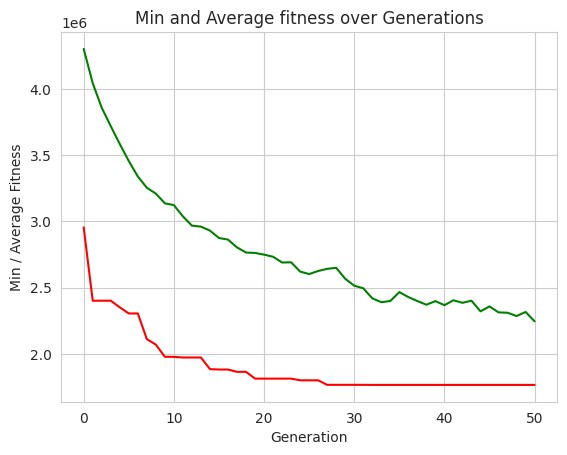

In [61]:
# Create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# Prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# Define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)


# Perform the Genetic Algorithm flow with hof feature added:
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

#population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
#                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# Print best individual info:
best = hof.items[0]
print("-- Best Ever Individual = ", best)
print("-- Best Ever Fitness = ", best.fitness.values[0])

# plot statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
plt.figure(2)
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')


# show both plots:
plt.show()


## 3. Creación del Gif

In [62]:
# Function for create the path between the cities
def plot_path(path, cities):
    fig, ax = plt.subplots(figsize=(10, 8))

    for edge in path:
        start, end = edge
        x = [cities[start, 0], cities[end, 0]]
        y = [cities[start, 1], cities[end, 1]]
        ax.plot(x, y, marker='o', color='b')

    ax.scatter(cities[:, 0], cities[:, 1], color='r', s=100, label='Cities')
    ax.set_title('Genetics Algorithm - Best Path')
    ax.legend()
    plt.axis('off')
    plt.show()

In [63]:
print("La ruta óptima que debe hacer el vendedor es:", best)
print("El costo óptimo de dicha ruta es:", "{:.2f}".format(best.fitness.values[0]), "\n")
print("Esta ruta corresponde a las ciudades:")
for i in range(0,len(best)):
  print(i+1,":",cities[best[i]])


La ruta óptima que debe hacer el vendedor es: Individual('i', [8, 10, 11, 9, 7, 14, 13, 3, 5, 0, 1, 2, 4, 6, 12])
El costo óptimo de dicha ruta es: 1766105.78 

Esta ruta corresponde a las ciudades:
1 : Monteria
2 : Cartagena
3 : Barranquilla
4 : Soledad
5 : Valledupar
6 : Cucuta
7 : Bucaramanga
8 : Bogota
9 : Armenia
10 : Palmira
11 : Pasto
12 : Tulua
13 : Pereira
14 : Manizales
15 : Medellin


## 3. Creación del GIF con la ruta óptima

In [64]:
#Instalamos geopandas para graficar el mapa de colombia
!pip install geopandas
!pip install shapely

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


/tmp/ipykernel_3763/876788744.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(colombia_gdf.geometry.centroid.x, colombia_gdf.geometry.centroid.y, colombia_gdf['ADMIN']):


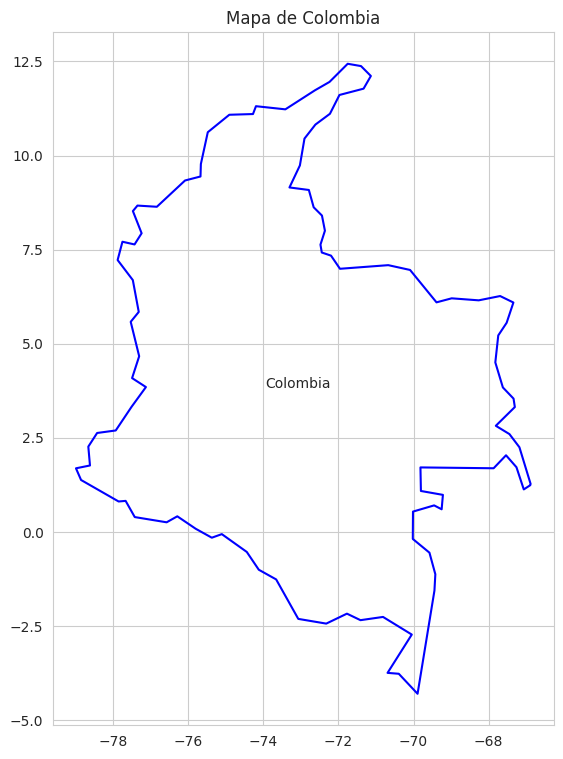

In [65]:
'''
La mayoría de este código es extraído del trabajo paralelo de mi compañero Edgar Alexis García,
que se encuentra en el noteboook Colonia_de_hormigas.ipynb, en este mismo repositorio.
'''
# Importamos las librerias que vamos a necesitar para graficar el mapa
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

#Descargamos el archivo geojson con las fronteras de colombia
url = 'https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson'
world_gdf = gpd.read_file(url)

# Filtrar solo el mapa de colombia
colombia_gdf = world_gdf[world_gdf['ADMIN'] == 'Colombia']
# Graficar las fronteras de Colombia
colombia_gdf.boundary.plot(figsize=(9,9), linewidth=1.5, color='blue')

# Añadir etiquetas
for x, y, label in zip(colombia_gdf.geometry.centroid.x, colombia_gdf.geometry.centroid.y, colombia_gdf['ADMIN']):
    plt.text(x, y, label, fontsize=10, ha='center', va='center')

plt.title('Mapa de Colombia')
plt.show()


Individual('i', [8, 10, 11, 9, 7, 14, 13, 3, 5, 0, 1, 2, 4, 6, 12])
1766105.782281


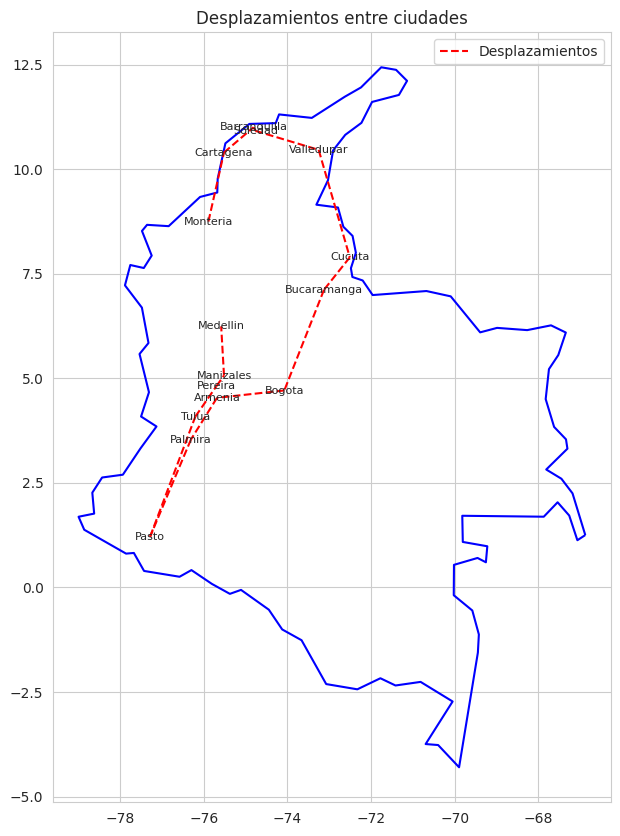

In [66]:
# Crear un GeoDataFrame con las ciudades y sus coordenadas
cities_data = {
    'City': ['Palmira', 'Pasto', 'Tulua', 'Bogota', 'Pereira', 'Armenia', 'Manizales', 'Valledupar', 'Monteria', 'Soledad', 'Cartagena', 'Barranquilla', 'Medellin', 'Bucaramanga', 'Cucuta'],
    'Latitude': [3.5394, 1.2136, 4.0847, 4.7110, 4.8143, 4.5341, 5.0687, 10.4634, 8.7479, 10.9184, 10.3997, 11.0041, 6.2442, 7.1194, 7.8938],
    'Longitude': [-76.3036, -77.2811, -76.1998, -74.07211, -75.6944, -75.6812, -75.5137, -73.2506, -75.8870, -74.7640, -75.5144, -74.8061, -75.5812, -73.1227, -72.5059]
}
# Ubicamos las ciudades en el geodataframe
cities_gdf = gpd.GeoDataFrame(cities_data, geometry=gpd.points_from_xy(cities_data['Longitude'], cities_data['Latitude']))

print(best)
print(best.fitness.values[0])

#Crear líneas que conectan las ciudades
lines_gdf = gpd.GeoDataFrame(geometry=[LineString([cities_gdf.loc[best[i], 'geometry'].coords[0], cities_gdf.loc[best[i+1], 'geometry'].coords[0]]) for i in range(len(cities_gdf) - 1)])
lines_gdf2 = gpd.GeoDataFrame(geometry=[LineString([cities_gdf.loc[best[-1], 'geometry'].coords[0], cities_gdf.loc[best[0], 'geometry'].coords[0]])])

# Graficar las fronteras de Colombia, las ciudades y las líneas de desplazamiento
fig, ax = plt.subplots(figsize=(10, 10))
colombia_gdf.boundary.plot(ax=ax, linewidth=1.5, color='blue')
lines_gdf.plot(ax=ax, color='red', linewidth=1.5, linestyle='dashed', label='Desplazamientos')

# Añadir etiquetas de las ciudades
for x, y, label in zip(cities_gdf.geometry.centroid.x, cities_gdf.geometry.centroid.y, cities_gdf['City']):
    plt.text(x, y, label, fontsize=8, ha='center', va='center')

plt.title('Desplazamientos entre ciudades')
plt.legend()
plt.show()

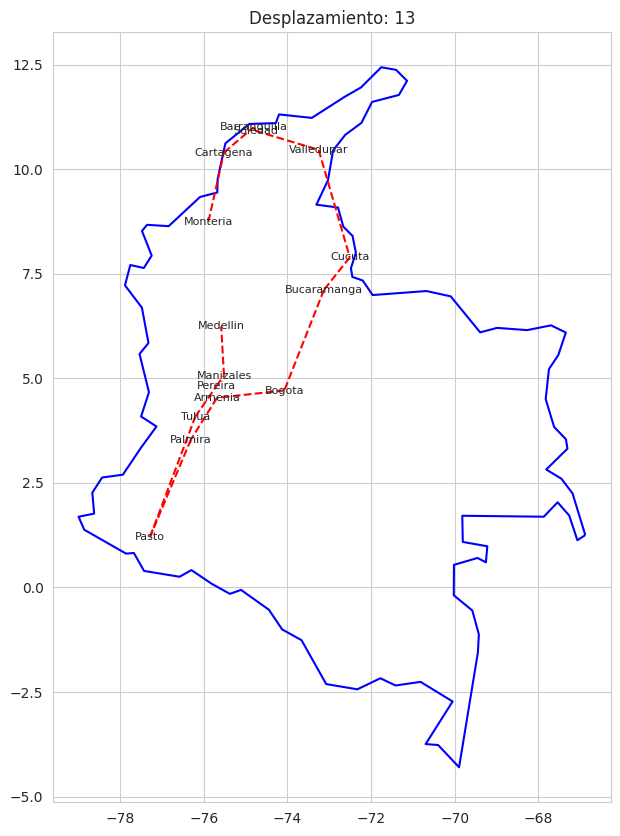

In [67]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

#Funcion para actualizar la figura en cada frame
def update_fig(dplamiento):
    ax.clear()  #Limpiar el eje antes de cada frame
    colombia_gdf.boundary.plot(ax=ax, linewidth=1.5, color='blue')
    lines_gdf[lines_gdf.index <= dplamiento].plot(ax=ax, color='red', linewidth=1.5, linestyle='dashed', label='Desplazamientos')

    #Añadir etiquetas de las ciudades
    for x, y, label in zip(cities_gdf.geometry.centroid.x, cities_gdf.geometry.centroid.y, cities_gdf['City']):
        plt.text(x, y, label, fontsize=8, ha='center', va='center')

    ax.set_title(f'Desplazamiento: {dplamiento}')

#Crear la animación
anim = FuncAnimation(fig, update_fig, frames=lines_gdf.index, repeat=False)

#Guardar la animación como un gif
anim.save('desplazamientos.gif', writer='pillow', fps=1)

plt.show()